In [ ]:
from google.colab import drive
drive.mount("/content/gdrive/")

KeyboardInterrupt: ignored

# **Shallow Neural Network**

In [ ]:
import tensorflow as tf
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import seed
from tensorflow.random import set_seed

**Load image dataset**

In [ ]:
#Load dataset images 200x
train_dataset_200x = tf.keras.preprocessing.image_dataset_from_directory('/content/gdrive/MyDrive/colab_notebooks/ws23_profile_areas/project02/images_200x/train')
val_dataset_200x = tf.keras.preprocessing.image_dataset_from_directory('/content/gdrive/MyDrive/colab_notebooks/ws23_profile_areas/project02/images_200x/eval')
test_dataset_200x = tf.keras.preprocessing.image_dataset_from_directory('/content/gdrive/MyDrive/colab_notebooks/ws23_profile_areas/project02/images_200x/test')
#Load dataset images 40x
train_dataset_40x = tf.keras.preprocessing.image_dataset_from_directory('/content/gdrive/MyDrive/colab_notebooks/ws23_profile_areas/project02/images_40x/train')
val_dataset_40x = tf.keras.preprocessing.image_dataset_from_directory('/content/gdrive/MyDrive/colab_notebooks/ws23_profile_areas/project02/images_40x/eval')
test_dataset_40x = tf.keras.preprocessing.image_dataset_from_directory('/content/gdrive/MyDrive/colab_notebooks/ws23_profile_areas/project02/images_40x/test')


Found 1408 files belonging to 2 classes.
Found 301 files belonging to 2 classes.
Found 304 files belonging to 2 classes.
Found 1395 files belonging to 2 classes.
Found 298 files belonging to 2 classes.
Found 302 files belonging to 2 classes.


**Normalization**

In [ ]:
rescale_layer = tf.keras.layers.Rescaling(1./255)

def normalize_image(image, label):
  return rescale_layer(image), label
# Apple function to original dataset
train_dataset_200x = train_dataset_200x.map(normalize_image)
val_dataset_200x = val_dataset_200x.map(normalize_image)
train_dataset_40x = train_dataset_40x.map(normalize_image)
val_dataset_40x = val_dataset_40x.map(normalize_image)
test_dataset_200x = test_dataset_200x.map(normalize_image)
test_dataset_40x = test_dataset_40x.map(normalize_image)

**Zoom Image Augmentation**

In [ ]:
# Create RandomZoom layer
random_zoom_layer = tf.keras.layers.experimental.preprocessing.RandomZoom((-0.3, -0.3))

# Apply RandomZoom layer to each image
def zoom_image(image, label):
  image = random_zoom_layer(image)
  return image, label

train_dataset_scaled_200x = train_dataset_200x.map(zoom_image)
val_dataset_scaled_200x = val_dataset_200x.map(zoom_image)
train_dataset_scaled_40x = train_dataset_40x.map(zoom_image)
val_dataset_scaled_40x = val_dataset_40x.map(zoom_image)
test_dataset_scaled_200x = test_dataset_200x.map(zoom_image)
test_dataset_scaled_40x = test_dataset_40x.map(zoom_image)

**Brightness Augmentation**

In [ ]:
def brightened_image(image, label):
  # This will increase the brightness of the image by 10%
  brightness_factor = 0.1

  # Adjust the brightness of the image
  adjusted_image = tf.image.adjust_brightness(image, brightness_factor)

  # Clip the image to make sure values are within a valid range (0 to 1)
  adjusted_image = tf.clip_by_value(adjusted_image, 0, 1)

  return adjusted_image, label

train_dataset_brightened_200x = train_dataset_200x.map(brightened_image)
val_dataset_brightened_200x = val_dataset_200x.map(brightened_image)
train_dataset_brightened_40x = train_dataset_40x.map(brightened_image)
val_dataset_brightened_40x = val_dataset_40x.map(brightened_image)
test_dataset_brightened_200x = test_dataset_200x.map(brightened_image)
test_dataset_brightened_40x = test_dataset_40x.map(brightened_image)

**Random Rotation Augmentation**

In [ ]:
# Create RandomRotation layer
random_rotation_layer = tf.keras.layers.experimental.preprocessing.RandomRotation(factor=0.2)

def image_rotation(image, label):
    return random_rotation_layer(image), label

train_dataset_rotated_200x = train_dataset_200x.map(image_rotation)
val_dataset_rotated_200x = val_dataset_200x.map(image_rotation)
train_dataset_rotated_40x = train_dataset_40x.map(image_rotation)
val_dataset_rotated_40x = val_dataset_40x.map(image_rotation)
test_dataset_rotated_200x = test_dataset_200x.map(image_rotation)
test_dataset_rotated_40x = test_dataset_40x.map(image_rotation)


**Magnification 200x**

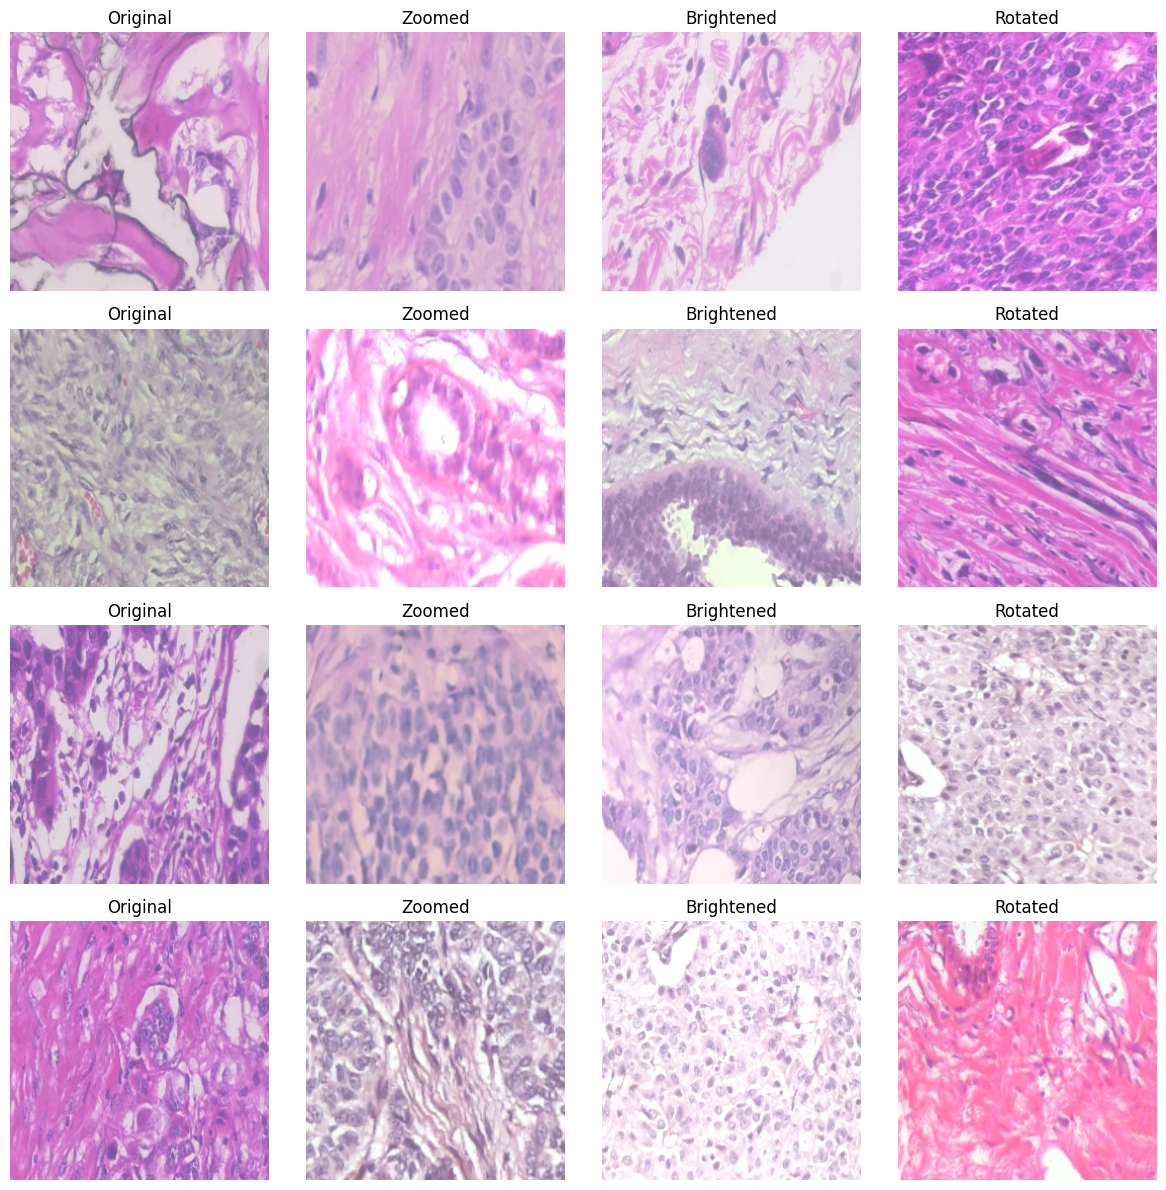

In [ ]:
augmented_dataset = tf.data.Dataset.zip((train_dataset_200x, train_dataset_scaled_200x, train_dataset_brightened_200x, train_dataset_rotated_200x))

# Create an iterator for the dataset.
iterator = augmented_dataset.as_numpy_iterator()

# Get the next batch from both iterators.
batch = iterator.next()

# Set up the subplots.
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(12, 12))

for i in range(4):
    axs[i, 0].imshow(batch[0][0][i])
    axs[i, 0].set_title("Original")
    axs[i, 0].axis('off')

    axs[i, 1].imshow(batch[1][0][i])
    axs[i, 1].set_title("Zoomed")
    axs[i, 1].axis('off')

    axs[i, 2].imshow(batch[2][0][i])
    axs[i, 2].set_title("Brightened")
    axs[i, 2].axis('off')

    axs[i, 3].imshow(batch[3][0][i])
    axs[i, 3].set_title("Rotated")
    axs[i, 3].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
snn_model = Sequential()
snn_model.add(Flatten(input_shape=(256, 256, 3)))
snn_model.add(Dense(128, activation='relu'))
snn_model.add(Dense(1, activation='sigmoid'))
snn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist = snn_model.fit(train_dataset_200x, batch_size=32, epochs=10, verbose=1, validation_data = val_dataset_200x)

Epoch 1/10
44/44 [==============================] - 18s 337ms/step - loss: 13.0456 - accuracy: 0.6065 - val_loss: 0.6368 - val_accuracy: 0.8870
Epoch 2/10
44/44 [==============================] - 17s 326ms/step - loss: 1.7283 - accuracy: 0.7010 - val_loss: 0.6874 - val_accuracy: 0.8671
Epoch 3/10
44/44 [==============================] - 18s 357ms/step - loss: 1.2445 - accuracy: 0.7862 - val_loss: 2.0198 - val_accuracy: 0.6910
Epoch 4/10
44/44 [==============================] - 17s 344ms/step - loss: 2.2794 - accuracy: 0.6669 - val_loss: 2.3439 - val_accuracy: 0.5648
Epoch 5/10
44/44 [==============================] - 17s 343ms/step - loss: 1.7285 - accuracy: 0.7358 - val_loss: 1.7086 - val_accuracy: 0.7110
Epoch 6/10
44/44 [==============================] - 17s 342ms/step - loss: 0.9276 - accuracy: 0.8189 - val_loss: 1.0128 - val_accuracy: 0.7110
Epoch 7/10
44/44 [==============================] - 17s 312ms/step - loss: 0.8912 - accuracy: 0.7486 - val_loss: 1.5210 - val_accuracy: 0.584

In [ ]:

snn_model_scaled = Sequential()
snn_model_scaled.add(Flatten(input_shape=(256, 256, 3)))
snn_model_scaled.add(Dense(128, activation='relu'))
snn_model_scaled.add(Dense(1, activation='sigmoid'))
snn_model_scaled.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist_scaled = snn_model_scaled.fit(train_dataset_scaled_200x, batch_size=32, epochs=10, verbose=1, validation_data=val_dataset_scaled_200x)

Epoch 1/10
44/44 [==============================] - 28s 534ms/step - loss: 23.1237 - accuracy: 0.6122 - val_loss: 0.5353 - val_accuracy: 0.6910
Epoch 2/10
44/44 [==============================] - 25s 531ms/step - loss: 0.9381 - accuracy: 0.6989 - val_loss: 0.5808 - val_accuracy: 0.7076
Epoch 3/10
44/44 [==============================] - 25s 511ms/step - loss: 0.5601 - accuracy: 0.7933 - val_loss: 0.4260 - val_accuracy: 0.8272
Epoch 4/10
44/44 [==============================] - 31s 654ms/step - loss: 0.5947 - accuracy: 0.7607 - val_loss: 0.5441 - val_accuracy: 0.7641
Epoch 5/10
44/44 [==============================] - 25s 521ms/step - loss: 0.4953 - accuracy: 0.8040 - val_loss: 0.4322 - val_accuracy: 0.8405
Epoch 6/10
44/44 [==============================] - 27s 537ms/step - loss: 0.8568 - accuracy: 0.7010 - val_loss: 0.4159 - val_accuracy: 0.8439
Epoch 7/10
44/44 [==============================] - 31s 660ms/step - loss: 0.5335 - accuracy: 0.7926 - val_loss: 0.4666 - val_accuracy: 0.760

In [ ]:
snn_model_brightened = Sequential()
snn_model_brightened.add(Flatten(input_shape=(256, 256, 3)))
snn_model_brightened.add(Dense(128, activation='relu'))
snn_model_brightened.add(Dense(1, activation='sigmoid'))
snn_model_brightened.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist_brightened = snn_model_brightened.fit(train_dataset_brightened_200x, epochs=10, verbose=1, validation_data=val_dataset_brightened_200x)

Epoch 1/10
44/44 [==============================] - 20s 386ms/step - loss: 19.8707 - accuracy: 0.5881 - val_loss: 2.1007 - val_accuracy: 0.6910
Epoch 2/10
44/44 [==============================] - 17s 349ms/step - loss: 1.1283 - accuracy: 0.7919 - val_loss: 0.6386 - val_accuracy: 0.8970
Epoch 3/10
44/44 [==============================] - 17s 349ms/step - loss: 0.7160 - accuracy: 0.8153 - val_loss: 0.4797 - val_accuracy: 0.8937
Epoch 4/10
44/44 [==============================] - 20s 406ms/step - loss: 0.9826 - accuracy: 0.7393 - val_loss: 0.8050 - val_accuracy: 0.7674
Epoch 5/10
44/44 [==============================] - 19s 351ms/step - loss: 1.3218 - accuracy: 0.7195 - val_loss: 2.7631 - val_accuracy: 0.4917
Epoch 6/10
44/44 [==============================] - 17s 348ms/step - loss: 1.1503 - accuracy: 0.7521 - val_loss: 1.6694 - val_accuracy: 0.5515
Epoch 7/10
44/44 [==============================] - 18s 354ms/step - loss: 0.9669 - accuracy: 0.7521 - val_loss: 0.5782 - val_accuracy: 0.760

In [ ]:
snn_model_rotated = Sequential()
snn_model_rotated.add(Flatten(input_shape=(256, 256, 3)))
snn_model_rotated.add(Dense(128, activation='relu'))
snn_model_rotated.add(Dense(1, activation='sigmoid'))
snn_model_rotated.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist_rotated = snn_model_rotated.fit(train_dataset_rotated_200x, epochs=10, verbose=1, validation_data=val_dataset_rotated_200x)

Epoch 1/10
44/44 [==============================] - 27s 543ms/step - loss: 15.5324 - accuracy: 0.6080 - val_loss: 0.6203 - val_accuracy: 0.6910
Epoch 2/10
44/44 [==============================] - 28s 551ms/step - loss: 1.0214 - accuracy: 0.6932 - val_loss: 0.6908 - val_accuracy: 0.6179
Epoch 3/10
44/44 [==============================] - 26s 536ms/step - loss: 2.2444 - accuracy: 0.6534 - val_loss: 1.0399 - val_accuracy: 0.6910
Epoch 4/10
44/44 [==============================] - 26s 525ms/step - loss: 0.5886 - accuracy: 0.8111 - val_loss: 0.4581 - val_accuracy: 0.8040
Epoch 5/10
44/44 [==============================] - 33s 668ms/step - loss: 0.6176 - accuracy: 0.7791 - val_loss: 0.8916 - val_accuracy: 0.5880
Epoch 6/10
44/44 [==============================] - 26s 547ms/step - loss: 0.5754 - accuracy: 0.7848 - val_loss: 0.4394 - val_accuracy: 0.7973
Epoch 7/10
44/44 [==============================] - 27s 547ms/step - loss: 0.5232 - accuracy: 0.7777 - val_loss: 0.4381 - val_accuracy: 0.830

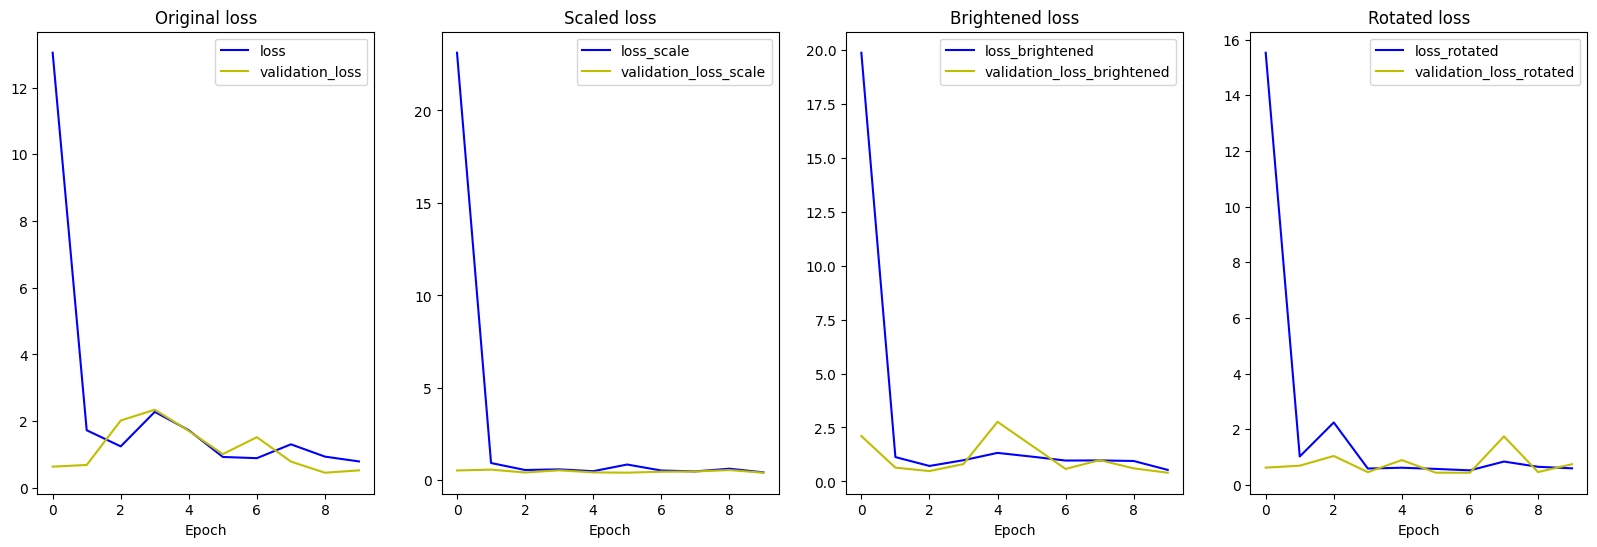

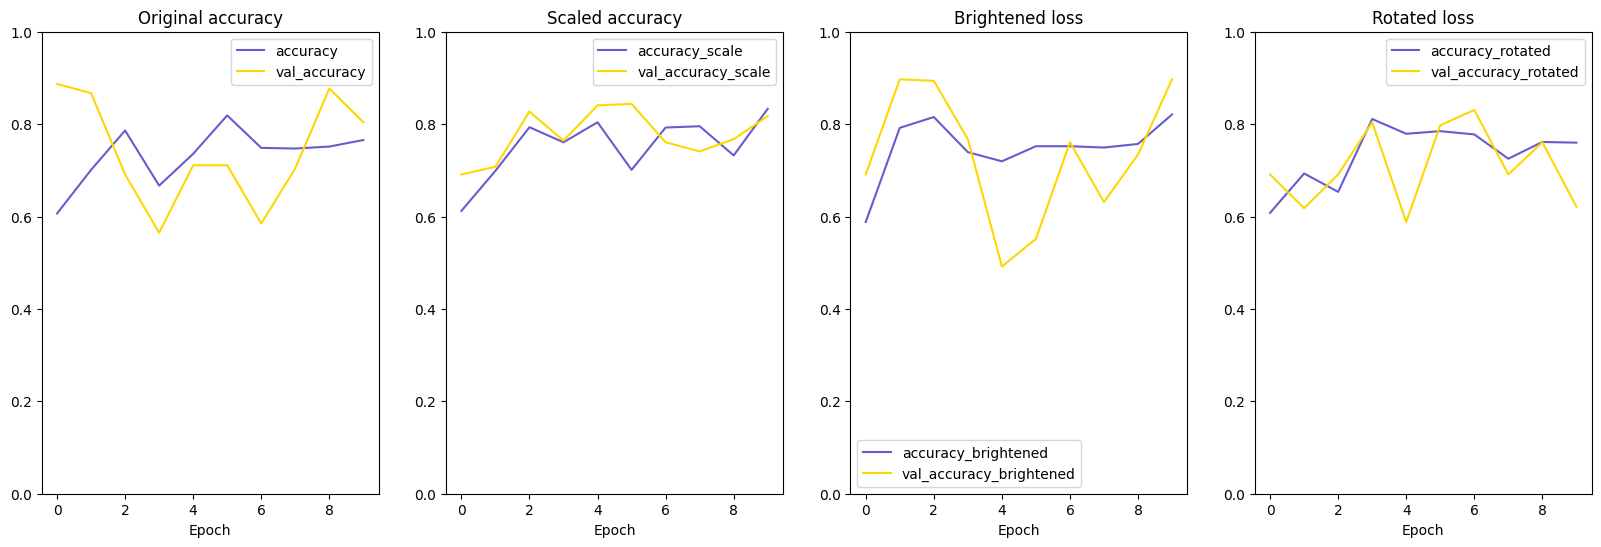

In [ ]:
plt.figure(figsize=(20, 6))
plt.subplot(1,4,1)
plt.plot(hist.history['loss'], color='b', label='loss')
plt.plot(hist.history['val_loss'], color='y', label='validation_loss')
plt.title("Original loss")
plt.legend()
plt.xlabel('Epoch')
plt.subplot(1,4,2)
plt.plot(hist_scaled.history['loss'], color='b', label='loss_scale')
plt.plot(hist_scaled.history['val_loss'], color='y', label='validation_loss_scale')
plt.title("Scaled loss")
plt.legend()
plt.xlabel('Epoch')
plt.subplot(1,4,3)
plt.plot(hist_brightened.history['loss'], color='b', label='loss_brightened')
plt.plot(hist_brightened.history['val_loss'], color='y', label='validation_loss_brightened')
plt.title("Brightened loss")
plt.legend()
plt.xlabel('Epoch')
plt.subplot(1,4,4)
plt.plot(hist_rotated.history['loss'], color='b', label='loss_rotated')
plt.plot(hist_rotated.history['val_loss'], color='y', label='validation_loss_rotated')
plt.title("Rotated loss")
plt.legend()
plt.xlabel('Epoch')
plt.show()

plt.figure(figsize=(20, 6))
plt.subplot(1,4,1)
plt.plot(hist.history['accuracy'], color='slateblue', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='gold', label='val_accuracy')
plt.title("Original accuracy")
plt.legend()
plt.xlabel('Epoch')
plt.ylim(0,1)
plt.subplot(1,4,2)
plt.plot(hist_scaled.history['accuracy'], color='slateblue', label='accuracy_scale')
plt.plot(hist_scaled.history['val_accuracy'], color='gold', label='val_accuracy_scale')
plt.title("Scaled accuracy")
plt.legend()
plt.xlabel('Epoch')
plt.ylim(0,1)
plt.subplot(1,4,3)
plt.plot(hist_brightened.history['accuracy'], color='slateblue', label='accuracy_brightened')
plt.plot(hist_brightened.history['val_accuracy'], color='gold', label='val_accuracy_brightened')
plt.title("Brightened loss")
plt.legend()
plt.xlabel('Epoch')
plt.ylim(0,1)
plt.subplot(1,4,4)
plt.plot(hist_rotated.history['accuracy'], color='slateblue', label='accuracy_rotated')
plt.plot(hist_rotated.history['val_accuracy'], color='gold', label='val_accuracy_rotated')
plt.title("Rotated loss")
plt.legend()
plt.xlabel('Epoch')
plt.ylim(0,1)
plt.show()


1/1 [==============================] - 0s 34ms/step


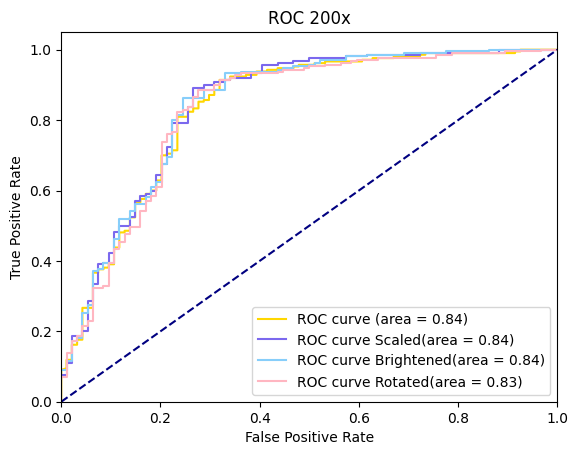

In [ ]:
# Step 1: Get model probability scores 200x
test_dataset_200x = test_dataset_200x.unbatch().batch(32).prefetch(tf.data.AUTOTUNE)
test_labels_200x = []
test_probs_200x = []
for images, labels in test_dataset_200x:
  probs = snn_model.predict(images)
  test_probs_200x.extend(probs)
  test_labels_200x.extend(labels.numpy())
test_probs_200x = np.array(test_probs_200x)
test_labels_200x = np.array(test_labels_200x)

test_dataset_scaled_200x = test_dataset_200x.unbatch().batch(32).prefetch(tf.data.AUTOTUNE)
test_scaled_probs_200x = []
test_labels_scaled_200x = []
for images, labels in test_dataset_scaled_200x:
  probs = snn_model_scaled.predict(images)
  test_scaled_probs_200x.extend(probs)
  test_labels_scaled_200x.extend(labels.numpy())
test_scaled_probs_200x = np.array(test_scaled_probs_200x)
test_labels_scaled_200x = np.array(test_labels_scaled_200x)

test_dataset_brightened_200x = test_dataset_brightened_200x.unbatch().batch(32).prefetch(tf.data.AUTOTUNE)
test_brightened_probs_200x = []
test_labels_brightened_200x = []
for images, labels in test_dataset_brightened_200x:
  probs = snn_model_brightened.predict(images)
  test_brightened_probs_200x.extend(probs)
  test_labels_brightened_200x.extend(labels.numpy())
test_brightened_probs_200x = np.array(test_brightened_probs_200x)
test_labels_brightened_200x = np.array(test_labels_brightened_200x)

test_dataset_rotated_200x = test_dataset_rotated_200x.unbatch().batch(32).prefetch(tf.data.AUTOTUNE)
test_rotated_probs_200x = []
test_labels_rotated_200x = []
for images, labels in test_dataset_rotated_200x:
  probs = snn_model_rotated.predict(images)
  test_rotated_probs_200x.extend(probs)
  test_labels_rotated_200x.extend(labels.numpy())
test_rotated_probs_200x = np.array(test_rotated_probs_200x)
test_labels_rotated_200x = np.array(test_labels_rotated_200x)

# Step 2: Calculate true and false positive rates
fpr_200x, tpr_200x, thresholds_200x = roc_curve(test_labels_200x, test_probs_200x)
fpr_scaled_200x, tpr_scaled_200x, thresholds_scaled_200x = roc_curve(test_labels_scaled_200x, test_scaled_probs_200x)
fpr_brightened_200x, tpr_brightened_200x, thresholds_brightened_200x = roc_curve(test_labels_brightened_200x, test_brightened_probs_200x)
fpr_rotated_200x, tpr_rotated_200x, thresholds_rotated_200x = roc_curve(test_labels_rotated_200x, test_rotated_probs_200x)

# Step 3: Calculate the area under the ROC curve
roc_auc_200x = auc(fpr_200x, tpr_200x)
roc_auc_scaled_200x = auc(fpr_scaled_200x, tpr_scaled_200x)
roc_auc_brightened_200x = auc(fpr_brightened_200x, tpr_brightened_200x)
roc_auc_rotated_200x = auc(fpr_rotated_200x, tpr_rotated_200x)
# Step 4: Plot the ROC curve
plt.figure()
plt.plot(fpr_200x, tpr_200x, color='gold', label='ROC curve (area = %0.2f)' % roc_auc_200x)
plt.plot(fpr_scaled_200x, tpr_scaled_200x, color='mediumslateblue', label='ROC curve Scaled(area = %0.2f)' % roc_auc_scaled_200x)
plt.plot(fpr_brightened_200x, tpr_brightened_200x, color='lightskyblue', label='ROC curve Brightened(area = %0.2f)' % roc_auc_brightened_200x)
plt.plot(fpr_rotated_200x, tpr_rotated_200x, color='lightpink', label='ROC curve Rotated(area = %0.2f)' % roc_auc_rotated_200x)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC 200x')
plt.legend(loc="lower right")
plt.show()


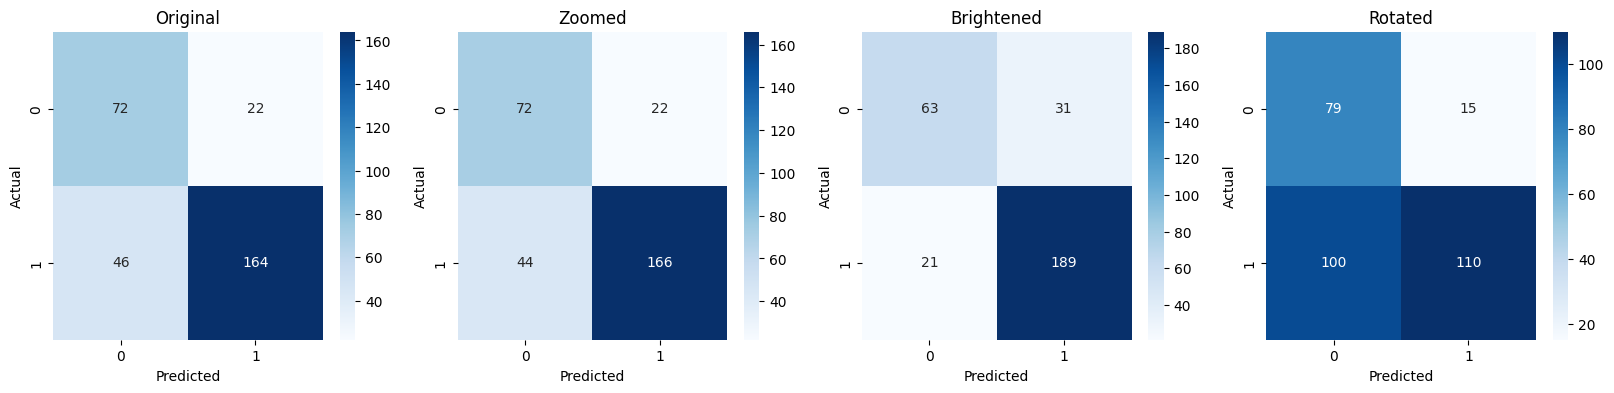

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
test_probs_200x = (test_probs_200x > 0.5).astype(int)
test_scaled_probs_200x = (test_scaled_probs_200x > 0.5).astype(int)
test_brightened_probs_200x = (test_brightened_probs_200x > 0.5).astype(int)
test_rotated_probs_200x = (test_rotated_probs_200x > 0.5).astype(int)

plt.figure(figsize=(20, 4))

plt.subplot(1,4,1)
sns.heatmap(confusion_matrix(test_labels_200x, test_probs_200x), annot=True, fmt='d', cmap='Blues')
plt.title('Original')
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.subplot(1,4,2)
sns.heatmap(confusion_matrix(test_labels_scaled_200x, test_scaled_probs_200x), annot=True, fmt='d', cmap='Blues')
plt.title('Zoomed')
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.subplot(1,4,3)
sns.heatmap(confusion_matrix(test_labels_brightened_200x, test_brightened_probs_200x), annot=True, fmt='d', cmap='Blues')
plt.title('Brightened')
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.subplot(1,4,4)
sns.heatmap(confusion_matrix(test_labels_rotated_200x, test_rotated_probs_200x), annot=True, fmt='d', cmap='Blues')
plt.title('Rotated')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**magnification 40x**

In [ ]:
augmented_dataset = tf.data.Dataset.zip((train_dataset_40x, train_dataset_scaled_40x, train_dataset_brightened_40x, train_dataset_rotated_40x))

# Create an iterator for the dataset.
iterator = augmented_dataset.as_numpy_iterator()

# Get the next batch from both iterators.
batch = iterator.next()

# Set up the subplots.
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(12, 12))  # 4行4列

for i in range(4):
    axs[i, 0].imshow(batch[0][0][i])
    axs[i, 0].set_title("Original")
    axs[i, 0].axis('off')

    axs[i, 1].imshow(batch[1][0][i])
    axs[i, 1].set_title("Zoomed")
    axs[i, 1].axis('off')

    axs[i, 2].imshow(batch[2][0][i])
    axs[i, 2].set_title("Brightened")
    axs[i, 2].axis('off')

    axs[i, 3].imshow(batch[3][0][i])
    axs[i, 3].set_title("Rotated")
    axs[i, 3].axis('off')

plt.tight_layout()
plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
snn_model_40x = Sequential()
snn_model_40x.add(Flatten(input_shape=(256, 256, 3)))
snn_model_40x.add(Dense(128, activation='relu'))
snn_model_40x.add(Dense(1, activation='sigmoid'))
snn_model_40x.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist_40x = snn_model_40x.fit(train_dataset_40x, batch_size=32, epochs=10, verbose=1, validation_data=val_dataset_40x, shuffle=True)

Epoch 1/10
44/44 [==============================] - 19s 354ms/step - loss: 33.3455 - accuracy: 0.5269 - val_loss: 1.0267 - val_accuracy: 0.6879
Epoch 2/10
44/44 [==============================] - 20s 419ms/step - loss: 0.8527 - accuracy: 0.6409 - val_loss: 0.5045 - val_accuracy: 0.7886
Epoch 3/10
44/44 [==============================] - 18s 341ms/step - loss: 0.6019 - accuracy: 0.6968 - val_loss: 0.5734 - val_accuracy: 0.6409
Epoch 4/10
44/44 [==============================] - 20s 377ms/step - loss: 0.5645 - accuracy: 0.7312 - val_loss: 0.6927 - val_accuracy: 0.6879
Epoch 5/10
44/44 [==============================] - 18s 365ms/step - loss: 0.6055 - accuracy: 0.7097 - val_loss: 0.4774 - val_accuracy: 0.7953
Epoch 6/10
44/44 [==============================] - 21s 425ms/step - loss: 0.5304 - accuracy: 0.7599 - val_loss: 0.5449 - val_accuracy: 0.6946
Epoch 7/10
44/44 [==============================] - 19s 383ms/step - loss: 0.5417 - accuracy: 0.7462 - val_loss: 0.4739 - val_accuracy: 0.791

In [ ]:
snn_model_scaled_40x = Sequential()
snn_model_scaled_40x.add(Flatten(input_shape=(256, 256, 3)))
snn_model_scaled_40x.add(Dense(128, activation='relu'))
snn_model_scaled_40x.add(Dense(1, activation='sigmoid'))
snn_model_scaled_40x.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist_scaled_40x = snn_model_scaled_40x.fit(train_dataset_scaled_40x, batch_size=32, epochs=10, verbose=1, validation_data=val_dataset_scaled_40x, shuffle=True)

Epoch 1/10
44/44 [==============================] - 27s 520ms/step - loss: 10.5288 - accuracy: 0.5928 - val_loss: 9.6761 - val_accuracy: 0.3121
Epoch 2/10
44/44 [==============================] - 28s 573ms/step - loss: 1.7521 - accuracy: 0.6638 - val_loss: 0.8688 - val_accuracy: 0.6644
Epoch 3/10
44/44 [==============================] - 26s 540ms/step - loss: 1.1406 - accuracy: 0.6968 - val_loss: 0.6050 - val_accuracy: 0.8087
Epoch 4/10
44/44 [==============================] - 27s 542ms/step - loss: 1.3149 - accuracy: 0.6538 - val_loss: 0.5457 - val_accuracy: 0.8154
Epoch 5/10
44/44 [==============================] - 32s 662ms/step - loss: 2.3628 - accuracy: 0.6179 - val_loss: 1.0110 - val_accuracy: 0.6678
Epoch 6/10
44/44 [==============================] - 26s 546ms/step - loss: 1.3086 - accuracy: 0.7161 - val_loss: 0.7303 - val_accuracy: 0.8020
Epoch 7/10
44/44 [==============================] - 27s 537ms/step - loss: 1.8005 - accuracy: 0.6824 - val_loss: 0.6347 - val_accuracy: 0.838

In [ ]:
snn_model_brightened_40x = Sequential()
snn_model_brightened_40x.add(Flatten(input_shape=(256, 256, 3)))
snn_model_brightened_40x.add(Dense(128, activation='relu'))
snn_model_brightened_40x.add(Dense(1, activation='sigmoid'))
snn_model_brightened_40x.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist_brightened_40x = snn_model_brightened_40x.fit(train_dataset_brightened_40x, epochs=10, verbose=1, validation_data=val_dataset_brightened_40x, shuffle=True)

Epoch 1/10
44/44 [==============================] - 21s 381ms/step - loss: 23.2273 - accuracy: 0.5606 - val_loss: 3.6008 - val_accuracy: 0.6879
Epoch 2/10
44/44 [==============================] - 18s 366ms/step - loss: 1.2459 - accuracy: 0.6430 - val_loss: 0.8156 - val_accuracy: 0.6007
Epoch 3/10
44/44 [==============================] - 21s 397ms/step - loss: 0.7063 - accuracy: 0.7104 - val_loss: 0.8290 - val_accuracy: 0.6946
Epoch 4/10
44/44 [==============================] - 18s 366ms/step - loss: 0.6140 - accuracy: 0.7405 - val_loss: 0.8780 - val_accuracy: 0.6879
Epoch 5/10
44/44 [==============================] - 20s 421ms/step - loss: 0.8781 - accuracy: 0.6839 - val_loss: 0.4855 - val_accuracy: 0.7919
Epoch 6/10
44/44 [==============================] - 18s 362ms/step - loss: 0.5593 - accuracy: 0.7685 - val_loss: 0.8109 - val_accuracy: 0.6879
Epoch 7/10
44/44 [==============================] - 18s 368ms/step - loss: 0.5269 - accuracy: 0.7591 - val_loss: 0.5053 - val_accuracy: 0.768

In [ ]:
snn_model_rotated_40x = Sequential()
snn_model_rotated_40x.add(Flatten(input_shape=(256, 256, 3)))
snn_model_rotated_40x.add(Dense(128, activation='relu'))
snn_model_rotated_40x.add(Dense(1, activation='sigmoid'))
snn_model_rotated_40x.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist_rotated_40x = snn_model_rotated_40x.fit(train_dataset_rotated_40x, epochs=10, verbose=1, validation_data=val_dataset_rotated_40x, shuffle=True)

Epoch 1/10
44/44 [==============================] - 29s 526ms/step - loss: 8.0411 - accuracy: 0.5599 - val_loss: 1.1031 - val_accuracy: 0.6879
Epoch 2/10
44/44 [==============================] - 28s 591ms/step - loss: 1.2926 - accuracy: 0.6731 - val_loss: 3.2411 - val_accuracy: 0.6879
Epoch 3/10
44/44 [==============================] - 27s 553ms/step - loss: 2.2910 - accuracy: 0.6638 - val_loss: 2.0103 - val_accuracy: 0.5302
Epoch 4/10
44/44 [==============================] - 33s 679ms/step - loss: 1.5738 - accuracy: 0.6538 - val_loss: 0.6145 - val_accuracy: 0.8020
Epoch 5/10
44/44 [==============================] - 26s 538ms/step - loss: 1.8400 - accuracy: 0.7111 - val_loss: 0.5975 - val_accuracy: 0.8289
Epoch 6/10
44/44 [==============================] - 28s 556ms/step - loss: 1.2183 - accuracy: 0.6703 - val_loss: 1.5503 - val_accuracy: 0.6879
Epoch 7/10
44/44 [==============================] - 28s 592ms/step - loss: 1.8503 - accuracy: 0.6409 - val_loss: 1.6754 - val_accuracy: 0.6879

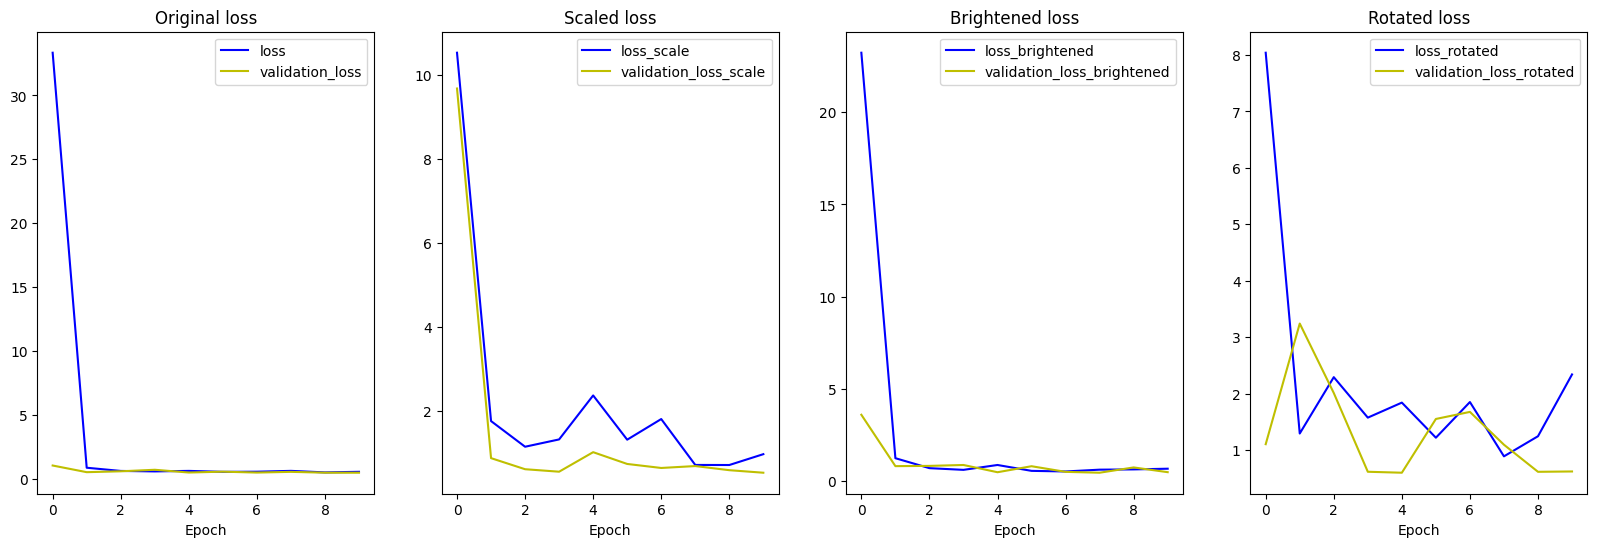

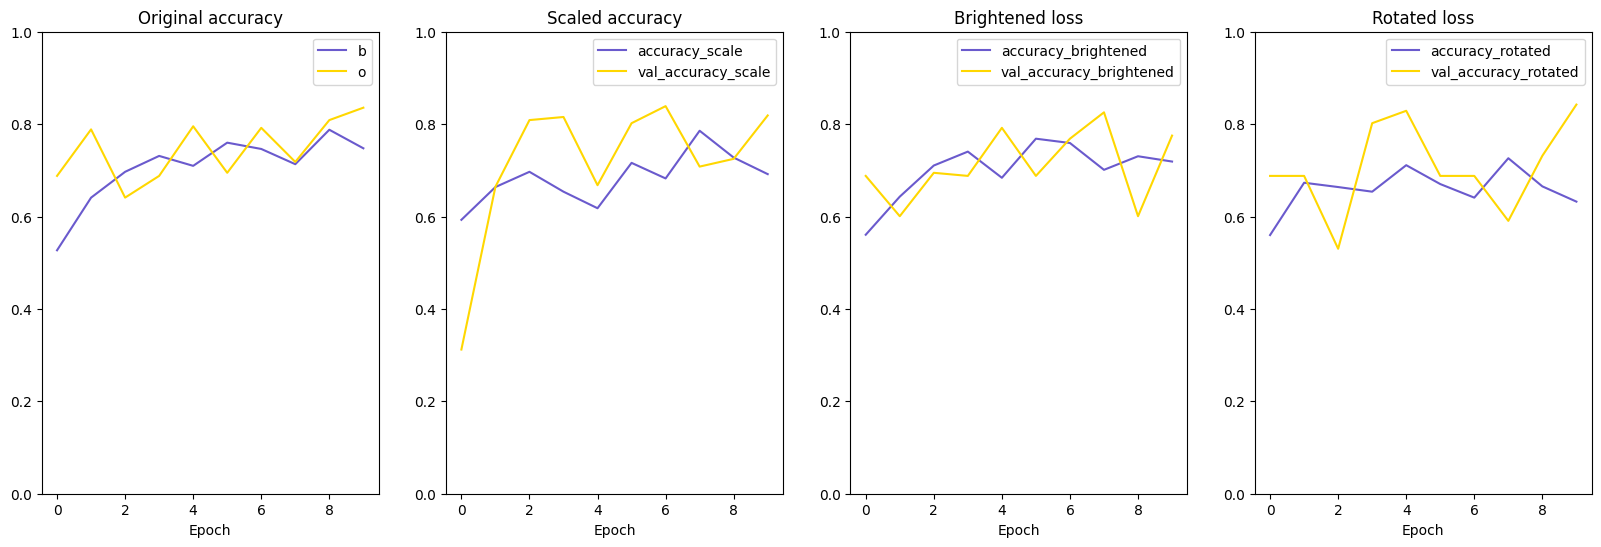

In [ ]:
plt.figure(figsize=(20, 6))
plt.subplot(1,4,1)
plt.plot(hist_40x.history['loss'], color='b', label='loss')
plt.plot(hist_40x.history['val_loss'], color='y', label='validation_loss')
plt.title("Original loss")
plt.legend()
plt.xlabel('Epoch')
plt.subplot(1,4,2)
plt.plot(hist_scaled_40x.history['loss'], color='b', label='loss_scale')
plt.plot(hist_scaled_40x.history['val_loss'], color='y', label='validation_loss_scale')
plt.title("Scaled loss")
plt.legend()
plt.xlabel('Epoch')
plt.subplot(1,4,3)
plt.plot(hist_brightened_40x.history['loss'], color='b', label='loss_brightened')
plt.plot(hist_brightened_40x.history['val_loss'], color='y', label='validation_loss_brightened')
plt.title("Brightened loss")
plt.legend()
plt.xlabel('Epoch')
plt.subplot(1,4,4)
plt.plot(hist_rotated_40x.history['loss'], color='b', label='loss_rotated')
plt.plot(hist_rotated_40x.history['val_loss'], color='y', label='validation_loss_rotated')
plt.title("Rotated loss")
plt.legend()
plt.xlabel('Epoch')
plt.show()

plt.figure(figsize=(20, 6))
plt.subplot(1,4,1)
plt.plot(hist_40x.history['accuracy'], color='slateblue', label='accuracy')
plt.plot(hist_40x.history['val_accuracy'], color='gold', label='val_accuracy')
plt.title("Original accuracy")
plt.legend('bottom')
plt.xlabel('Epoch')
plt.ylim(0,1)
plt.subplot(1,4,2)
plt.plot(hist_scaled_40x.history['accuracy'], color='slateblue', label='accuracy_scale')
plt.plot(hist_scaled_40x.history['val_accuracy'], color='gold', label='val_accuracy_scale')
plt.title("Scaled accuracy")
plt.legend()
plt.xlabel('Epoch')
plt.ylim(0,1)
plt.subplot(1,4,3)
plt.plot(hist_brightened_40x.history['accuracy'], color='slateblue', label='accuracy_brightened')
plt.plot(hist_brightened_40x.history['val_accuracy'], color='gold', label='val_accuracy_brightened')
plt.title("Brightened loss")
plt.legend()
plt.xlabel('Epoch')
plt.ylim(0,1)
plt.subplot(1,4,4)
plt.plot(hist_rotated_40x.history['accuracy'], color='slateblue', label='accuracy_rotated')
plt.plot(hist_rotated_40x.history['val_accuracy'], color='gold', label='val_accuracy_rotated')
plt.title("Rotated loss")
plt.legend()
plt.xlabel('Epoch')
plt.ylim(0,1)
plt.show()


1/1 [==============================] - 0s 50ms/step


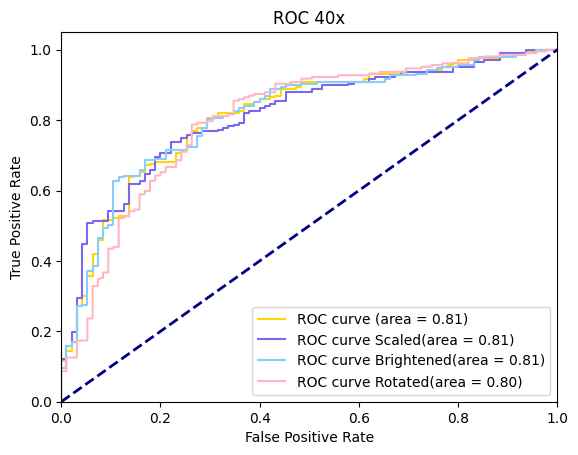

In [ ]:
# Step 1: Get model probability scores 40x
test_dataset_40x = test_dataset_40x.unbatch().batch(32).prefetch(tf.data.AUTOTUNE)
test_labels_40x = []
test_probs_40x = []
for images, labels in test_dataset_40x:
  probs = snn_model_40x.predict(images)
  test_probs_40x.extend(probs)
  test_labels_40x.extend(labels.numpy())
test_probs_40x = np.array(test_probs_40x)
test_labels_40x = np.array(test_labels_40x)

test_dataset_scaled_40x = test_dataset_40x.unbatch().batch(32).prefetch(tf.data.AUTOTUNE)
test_scaled_probs_40x = []
test_labels_scaled_40x = []
for images, labels in test_dataset_scaled_40x:
  probs = snn_model_scaled_40x.predict(images)
  test_scaled_probs_40x.extend(probs)
  test_labels_scaled_40x.extend(labels.numpy())
test_scaled_probs_40x = np.array(test_scaled_probs_40x)
test_labels_scaled_40x = np.array(test_labels_scaled_40x)

test_dataset_brightened_40x = test_dataset_brightened_40x.unbatch().batch(32).prefetch(tf.data.AUTOTUNE)
test_brightened_probs_40x = []
test_labels_brightened_40x = []
for images, labels in test_dataset_brightened_40x:
  probs = snn_model_brightened_40x.predict(images)
  test_brightened_probs_40x.extend(probs)
  test_labels_brightened_40x.extend(labels.numpy())
test_brightened_probs_40x = np.array(test_brightened_probs_40x)
test_labels_brightened_40x = np.array(test_labels_brightened_40x)

test_dataset_rotated_40x = test_dataset_rotated_40x.unbatch().batch(32).prefetch(tf.data.AUTOTUNE)
test_rotated_probs_40x = []
test_labels_rotated_40x = []
for images, labels in test_dataset_rotated_40x:
  probs = snn_model_rotated_40x.predict(images)
  test_rotated_probs_40x.extend(probs)
  test_labels_rotated_40x.extend(labels.numpy())
test_rotated_probs_40x = np.array(test_rotated_probs_40x)
test_labels_rotated_40x = np.array(test_labels_rotated_40x)


# Step 2: Calculate true and false positive rates
fpr_40x, tpr_40x, thresholds_40x = roc_curve(test_labels_40x, test_probs_40x)
fpr_scaled_40x, tpr_scaled_40x, thresholds_scaled_40x = roc_curve(test_labels_scaled_40x, test_scaled_probs_40x)
fpr_brightened_40x, tpr_brightened_40x, thresholds_brightened_40x = roc_curve(test_labels_brightened_40x, test_brightened_probs_40x)
fpr_rotated_40x, tpr_rotated_40x, thresholds_rotated_40x = roc_curve(test_labels_rotated_40x, test_rotated_probs_40x)

# Step 3: Calculate the area under the ROC curve
roc_auc_40x = auc(fpr_40x, tpr_40x)
roc_auc_scaled_40x = auc(fpr_scaled_40x, tpr_scaled_40x)
roc_auc_brightened_40x = auc(fpr_brightened_40x, tpr_brightened_40x)
roc_auc_rotated_40x = auc(fpr_rotated_40x, tpr_rotated_40x)
# Step 4: Plot the ROC curve
plt.figure()
plt.plot(fpr_40x, tpr_40x, color='gold', label='ROC curve (area = %0.2f)' % roc_auc_40x)
plt.plot(fpr_scaled_40x, tpr_scaled_40x, color='mediumslateblue', label='ROC curve Scaled(area = %0.2f)' % roc_auc_scaled_40x)
plt.plot(fpr_brightened_40x, tpr_brightened_40x, color='lightskyblue', label='ROC curve Brightened(area = %0.2f)' % roc_auc_brightened_40x)
plt.plot(fpr_rotated_40x, tpr_rotated_40x, color='lightpink', label='ROC curve Rotated(area = %0.2f)' % roc_auc_rotated_40x)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC 40x')
plt.legend(loc="lower right")
plt.show()

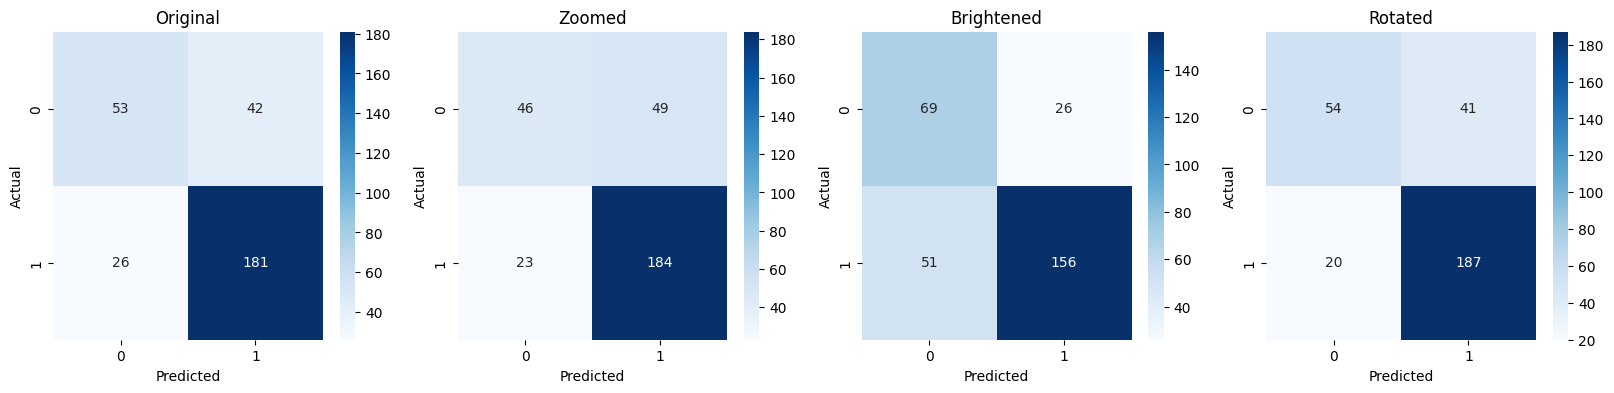

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
test_probs_40x = (test_probs_40x > 0.5).astype(int)
plt.figure(figsize=(20, 4))

plt.subplot(1,4,1)
sns.heatmap(confusion_matrix(test_labels_40x, test_probs_40x), annot=True, fmt='d', cmap='Blues')
plt.title('Original')
plt.ylabel('Actual')
plt.xlabel('Predicted')

test_scaled_probs_40x = (test_scaled_probs_40x > 0.5).astype(int)
plt.subplot(1,4,2)
sns.heatmap(confusion_matrix(test_labels_scaled_40x, test_scaled_probs_40x), annot=True, fmt='d', cmap='Blues')
plt.title('Zoomed')
plt.ylabel('Actual')
plt.xlabel('Predicted')

test_brightened_probs_40x = (test_brightened_probs_40x > 0.5).astype(int)
plt.subplot(1,4,3)
sns.heatmap(confusion_matrix(test_labels_brightened_40x, test_brightened_probs_40x), annot=True, fmt='d', cmap='Blues')
plt.title('Brightened')
plt.ylabel('Actual')
plt.xlabel('Predicted')

test_rotated_probs_40x = (test_rotated_probs_40x > 0.5).astype(int)
plt.subplot(1,4,4)
sns.heatmap(confusion_matrix(test_labels_rotated_40x, test_rotated_probs_40x), annot=True, fmt='d', cmap='Blues')
plt.title('Rotated')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()